In the realm of Natural Language Processing (NLP), TF-IDF (Term Frequency-Inverse Document Frequency) is a powerful technique used to analyze and understand the importance of words in a document corpus. TF-IDF plays a crucial role in tasks such as text mining, information retrieval, and document classification. Let’s delve into the concepts and applications of TF-IDF in NLP

__What is TF-IDF?__

TF-IDF is a numerical statistic that reflects the significance of a word within a document relative to a collection of documents, known as a corpus. The idea behind TF-IDF is to quantify the importance of a term in a document with respect to its frequency in the document and its rarity across multiple documents.

__Term Frequency (TF)__
TF measures the frequency of a term within a document. It is calculated as the ratio of the number of times a term occurs in a document to the total number of terms in that document. The goal is to emphasize words that are frequent within a document.

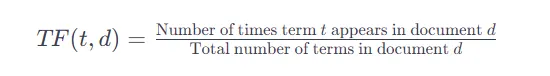


__Inverse Document Frequency (IDF)__

IDF measures the rarity of a term across a collection of documents. It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term. The goal is to penalize words that are common across all documents.

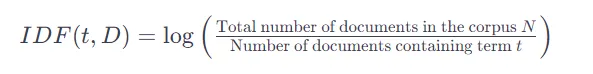



__Combining TF and IDF: TF-IDF__
The TF-IDF score for a term in a document is obtained by multiplying its TF and IDF scores.

TF-IDF(t,d,D)=TF(t,d)×IDF(t,D)

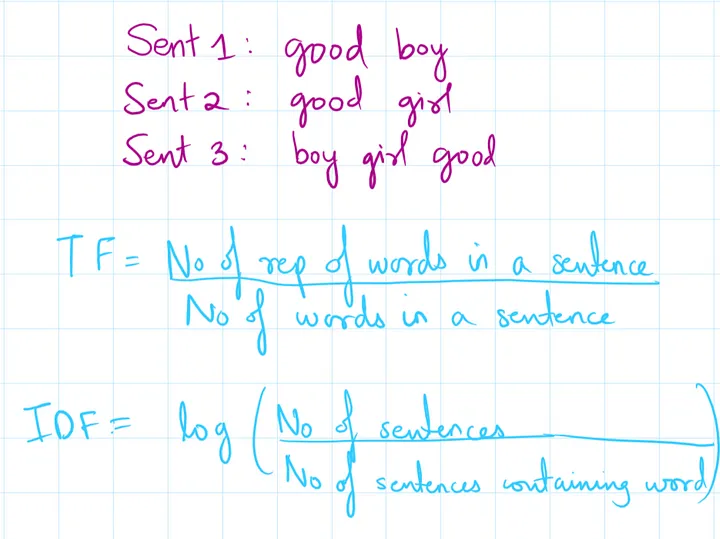

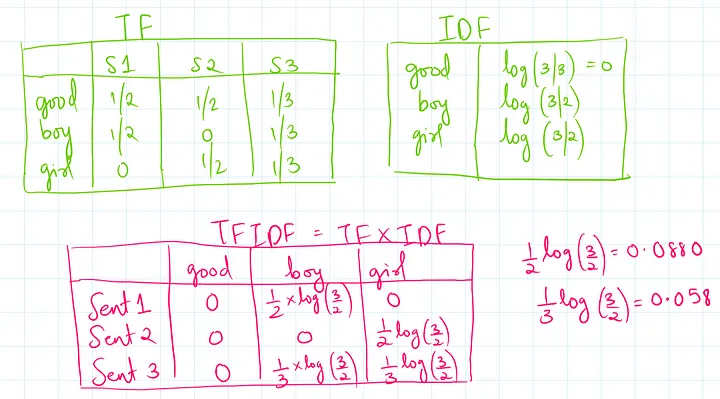

__Advantages of TF-IDF__

1) fixed size

2) Intuitive

3) Importance of the word is also getting captured

Simplicity: TF-IDF is easy to understand and implement. It provides a straightforward way to quantify the importance of a term in a document relative to a collection of documents.
Relevance: By weighing terms based on their frequency in a document and their rarity across a corpus, TF-IDF helps identify the most relevant terms for a given document.
Dimensionality Reduction: TF-IDF can help reduce dimensionality by filtering out common words (stop words), allowing for more efficient processing in downstream tasks like clustering or classification.
Effectiveness in Information Retrieval: It is effective in search engines and document retrieval systems, as it helps rank documents based on their relevance to a search query.
No Assumption of Data Distribution: TF-IDF does not assume any specific distribution of data, making it versatile across various types of text data.

__Disadvantages of TF-IDF__

Context Ignorance: TF-IDF does not consider the context in which terms appear. Words with multiple meanings (polysemy) or synonyms may be treated as separate entities, leading to potential misinterpretation.
Document Length Sensitivity: Longer documents may have higher term frequencies, which can skew the importance of terms. This can affect comparisons between documents of varying lengths.
Lack of Semantic Understanding: TF-IDF does not capture the semantic meaning of words or phrases, which can limit its effectiveness in understanding the content of documents.
Sparse Representation: The resulting vectors can be very sparse, especially in large corpora, which can make them less efficient for certain machine learning algorithms.
Static Representation: TF-IDF generates static representations of documents, which may not adapt well to changes in language or usage over time.

1) Sparcity of the matrix

2) OOV (Out of vocabulary. Eg: test word is given as a new dataset model will not give correct result)

Conclusion

TF-IDF is a powerful tool for text analysis and information retrieval, but it has limitations that can affect its performance in certain contexts. Depending on the application, it may be beneficial to combine TF-IDF with other methods, such as word embeddings or natural language processing techniques, to improve the understanding of text data.

## Practical Implementation

In [1]:
import pandas as pd
messages=pd.read_csv('SMSSpamCollection.txt',sep='\t',names=['label','message'])

In [2]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
## Data Cleaning and Preprocessing

import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
WordNetLemmatizer=WordNetLemmatizer()

In [17]:
corpus=[]

for i in range(0,len(messages['message'])):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[WordNetLemmatizer.lemmatize(word) for word  in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [19]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=100)

In [26]:
X=tfidf.fit_transform(corpus).toarray()

In [28]:
## In order to see full vector we can use below line of code:

import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

In [29]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.434, 0, 0, 0.461, 0.544, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0.473, 0, 0, 0, 0, 0, 0, 0, 0.492, 0, 0, 0, 0, 0, 0, 0, 0.571, 0, 0, 0, 0, 0, 0],
       [0.465, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.485, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.574, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## N-Grams in TFIDF

In [30]:
tfidf=TfidfVectorizer(max_features=100,ngram_range=(2,2))
x=tfidf.fit_transform(corpus).toarray()

In [33]:
tfidf.vocabulary_   # Top 100 most frequent occuring words with 2 combinations

{'free entry': 31,
 'claim call': 15,
 'call claim': 3,
 'free call': 30,
 'chance win': 14,
 'txt word': 89,
 'let know': 54,
 'please call': 66,
 'lt gt': 58,
 'want go': 97,
 'like lt': 55,
 'sorry call': 79,
 'call later': 8,
 'ur awarded': 90,
 'hi hi': 47,
 'call customer': 4,
 'customer service': 22,
 'guaranteed cash': 42,
 'cash prize': 13,
 'po box': 68,
 'trying contact': 86,
 'draw show': 27,
 'show prize': 78,
 'prize guaranteed': 72,
 'guaranteed call': 41,
 'valid hr': 95,
 'selected receive': 75,
 'private account': 70,
 'account statement': 0,
 'statement show': 80,
 'call identifier': 5,
 'identifier code': 50,
 'code expires': 19,
 'urgent mobile': 94,
 'call landline': 7,
 'wat time': 98,
 'give call': 34,
 'ur mob': 93,
 'gud ni': 44,
 'new year': 62,
 'send stop': 77,
 'co uk': 18,
 'gud mrng': 43,
 'nice day': 63,
 'lt decimal': 57,
 'decimal gt': 24,
 'txt nokia': 87,
 'good morning': 36,
 'ur friend': 92,
 'good night': 37,
 'reply call': 74,
 'last night': 53,

In [34]:
x

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0